# K Means Clustering

In [1]:
# import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# load data

df = pd.read_csv('D:/Study/DataScience/KMeansClustering/customerdata.csv')

In [4]:
# Split the data into traning and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.3, random_state = 0)

In [13]:
# fit K means clustering model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
# Predict on tesing datasets
kmeans.predict(X_test)

array([0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0])

In [16]:
# To find out optimum number of clusters using elbow curve

n_clusters = range(3, 25)
score = []

for i in n_clusters:
    kmeans1 = KMeans( n_clusters = i)
    kmeans1.fit(X_train)
    score.append(kmeans1.inertia_)

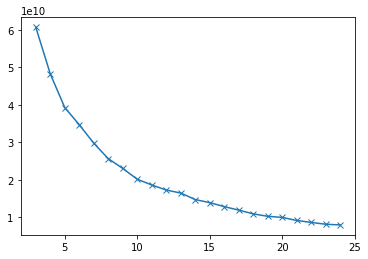

In [17]:
# Plot the elbow curve

plt.plot(n_clusters, score, marker = 'x')

In [18]:
# Now scale the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_scaled = sc.fit_transform(df)

In [19]:
# Split the data into training and testing

X_train_scaled, X_test_scaled = train_test_split(df_scaled, test_size = 0.3, random_state = 0)

In [20]:
# Find out the optimum number of clusters using elbow curve

n_clusters = range(3, 25)
score_scaled = []

for i in n_clusters:
    kmeans_scaled = KMeans( n_clusters = i)
    kmeans_scaled.fit(X_train_scaled)
    score_scaled.append(kmeans_scaled.inertia_)

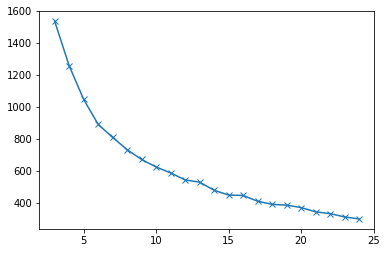

In [21]:
# Plot the elbow curve

plt.plot(n_clusters, score_scaled, marker = 'x')

In [28]:
# Use Grid Search CV to find best number of clusters

from sklearn.model_selection import GridSearchCV

kmeans_gs = KMeans()

param_grid = {'n_clusters' : [5, 10, 15]}

grid = GridSearchCV(kmeans_gs, param_grid = param_grid, cv=5)

grid.fit(X_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_clusters': [5, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [29]:
grid.best_params_

{'n_clusters': 15}